In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.models import Sequential

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

#df = pd.read_csv('META LSTM.csv')
#df = pd.read_csv('PFE LSTM.csv')
#df = pd.read_excel('TSLA LSTM.xlsx')
df = pd.read_excel('WMT LSTM.xlsx')

#df = pd.read_csv('Stock Prices updated.csv')

df = df[['Symbol','Date','Open','High','Low','Close','Adj Close','Volume']]

df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,WMT,2022-02-28,132.910740,135.000000,136.070007,133.770004,135.160004,26370300
1,WMT,2022-03-01,133.767269,135.869995,137.889999,135.020004,135.990005,31086900
2,WMT,2022-03-02,133.560518,135.660004,136.830002,135.179993,136.160004,21104400
3,WMT,2022-03-03,135.165290,137.289993,140.470001,136.550003,139.289993,19110600
4,WMT,2022-03-04,135.677236,137.809998,142.940002,137.589996,142.820007,20910700
...,...,...,...,...,...,...,...,...
245,WMT,2023-02-17,145.110001,145.110001,146.690002,144.570007,146.440002,8250700
246,WMT,2023-02-21,142.880005,142.880005,148.339996,142.149994,147.330002,18131300
247,WMT,2023-02-22,146.770004,146.770004,147.570007,142.759995,144.240005,9948000
248,WMT,2023-02-23,144.369995,144.369995,144.369995,140.710007,142.089996,7340400


In [5]:
df['returns'] = df.Close.pct_change()

In [6]:
df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,returns
0,WMT,2022-02-28,132.910740,135.000000,136.070007,133.770004,135.160004,26370300,NaN
1,WMT,2022-03-01,133.767269,135.869995,137.889999,135.020004,135.990005,31086900,0.009344
2,WMT,2022-03-02,133.560518,135.660004,136.830002,135.179993,136.160004,21104400,0.001185
3,WMT,2022-03-03,135.165290,137.289993,140.470001,136.550003,139.289993,19110600,0.010135
4,WMT,2022-03-04,135.677236,137.809998,142.940002,137.589996,142.820007,20910700,0.007616
...,...,...,...,...,...,...,...,...,...
245,WMT,2023-02-17,145.110001,145.110001,146.690002,144.570007,146.440002,8250700,0.002705
246,WMT,2023-02-21,142.880005,142.880005,148.339996,142.149994,147.330002,18131300,-0.016739
247,WMT,2023-02-22,146.770004,146.770004,147.570007,142.759995,144.240005,9948000,0.004291
248,WMT,2023-02-23,144.369995,144.369995,144.369995,140.710007,142.089996,7340400,-0.014360


In [7]:
df['log_returns'] = np.log(1+ df['returns'])
df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,returns,log_returns
0,WMT,2022-02-28,132.910740,135.000000,136.070007,133.770004,135.160004,26370300,NaN,NaN
1,WMT,2022-03-01,133.767269,135.869995,137.889999,135.020004,135.990005,31086900,0.009344,0.009301
2,WMT,2022-03-02,133.560518,135.660004,136.830002,135.179993,136.160004,21104400,0.001185,0.001184
3,WMT,2022-03-03,135.165290,137.289993,140.470001,136.550003,139.289993,19110600,0.010135,0.010084
4,WMT,2022-03-04,135.677236,137.809998,142.940002,137.589996,142.820007,20910700,0.007616,0.007587
...,...,...,...,...,...,...,...,...,...,...
245,WMT,2023-02-17,145.110001,145.110001,146.690002,144.570007,146.440002,8250700,0.002705,0.002701
246,WMT,2023-02-21,142.880005,142.880005,148.339996,142.149994,147.330002,18131300,-0.016739,-0.016881
247,WMT,2023-02-22,146.770004,146.770004,147.570007,142.759995,144.240005,9948000,0.004291,0.004282
248,WMT,2023-02-23,144.369995,144.369995,144.369995,140.710007,142.089996,7340400,-0.014360,-0.014464


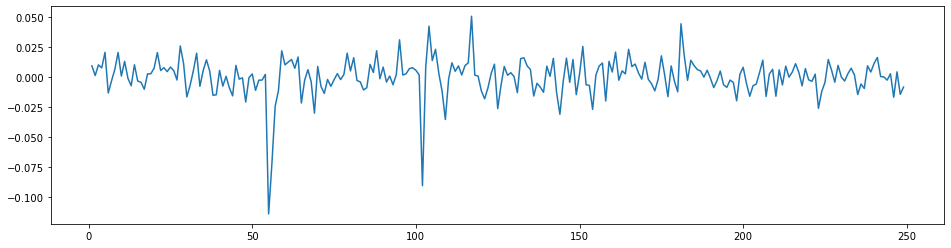

In [8]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (16,4))
plt.plot(df.log_returns)


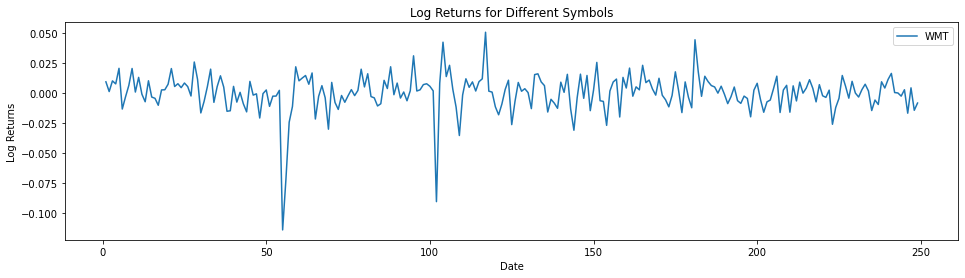

In [9]:
grouped_data = df.groupby("Symbol")

# Loop through each group and plot the data
plt.figure(1, figsize=(16, 4))
for symbol, group in grouped_data:
    plt.plot(group["log_returns"], label=symbol)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Log Returns for Different Symbols")
plt.legend()

# Show the plot
plt.show()

### Preprocessing Steps

In [10]:
df.dropna(inplace = True)
X = df[['Close','log_returns']].values
X

array([[ 1.35020004e+02,  9.30100801e-03],
       [ 1.35179993e+02,  1.18422221e-03],
       [ 1.36550003e+02,  1.00837010e-02],
       [ 1.37589996e+02,  7.58735093e-03],
       [ 1.40449997e+02,  2.05733099e-02],
       [ 1.38580002e+02, -1.34037423e-02],
       [ 1.38139999e+02, -3.18012987e-03],
       [ 1.39009995e+02,  6.27817411e-03],
       [ 1.41880005e+02,  2.04358310e-02],
       [ 1.41990005e+02,  7.75006880e-04],
       [ 1.43850006e+02,  1.30144611e-02],
       [ 1.43699997e+02, -1.04336089e-03],
       [ 1.42649994e+02, -7.33373661e-03],
       [ 1.44110001e+02,  1.01828661e-02],
       [ 1.43619995e+02, -3.40601245e-03],
       [ 1.42979996e+02, -4.46615830e-03],
       [ 1.41520004e+02, -1.02636500e-02],
       [ 1.41880005e+02,  2.54058421e-03],
       [ 1.42259995e+02,  2.67466620e-03],
       [ 1.43300003e+02,  7.28402582e-03],
       [ 1.46250000e+02,  2.03771296e-02],
       [ 1.47039993e+02,  5.38712693e-03],
       [ 1.48179993e+02,  7.72308868e-03],
       [ 1.

In [11]:
X

array([[ 1.35020004e+02,  9.30100801e-03],
       [ 1.35179993e+02,  1.18422221e-03],
       [ 1.36550003e+02,  1.00837010e-02],
       [ 1.37589996e+02,  7.58735093e-03],
       [ 1.40449997e+02,  2.05733099e-02],
       [ 1.38580002e+02, -1.34037423e-02],
       [ 1.38139999e+02, -3.18012987e-03],
       [ 1.39009995e+02,  6.27817411e-03],
       [ 1.41880005e+02,  2.04358310e-02],
       [ 1.41990005e+02,  7.75006880e-04],
       [ 1.43850006e+02,  1.30144611e-02],
       [ 1.43699997e+02, -1.04336089e-03],
       [ 1.42649994e+02, -7.33373661e-03],
       [ 1.44110001e+02,  1.01828661e-02],
       [ 1.43619995e+02, -3.40601245e-03],
       [ 1.42979996e+02, -4.46615830e-03],
       [ 1.41520004e+02, -1.02636500e-02],
       [ 1.41880005e+02,  2.54058421e-03],
       [ 1.42259995e+02,  2.67466620e-03],
       [ 1.43300003e+02,  7.28402582e-03],
       [ 1.46250000e+02,  2.03771296e-02],
       [ 1.47039993e+02,  5.38712693e-03],
       [ 1.48179993e+02,  7.72308868e-03],
       [ 1.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1)).fit(X)
X_scaled = scaler.transform(X)

In [13]:
X_scaled[:5]

array([[0.42464122, 0.74916245],
       [0.4284687 , 0.69996828],
       [0.46124406, 0.75390619],
       [0.48612427, 0.73877633],
       [0.55454532, 0.81748156]])

In [14]:
y = [x[0] for x in X_scaled]

y[:5]

[0.42464122383585945,
 0.4284686965403104,
 0.4612440565714979,
 0.48612427029833283,
 0.5545453197694998]

In [15]:
split = int(len(X_scaled) * 0.7 )

print(split)

174


In [16]:
x_train = X_scaled[:split]
x_test = X_scaled[split : len(X_scaled)]

y_train = y[:split]
y_test = y[split : len(y)]

In [17]:
assert len(x_train) == len(y_train)
assert len(x_test) == len(y_test)

In [18]:
n =3 

xtrain = []
ytrain = []

xtest = []
ytest = []

for i in range(n, len(x_train)):
    xtrain.append(x_train[i - n : i, : x_train.shape[1]])
    ytrain.append(y_train[i])  # predict next record
    
for i in range(n, len(x_test)):
    xtest.append(x_test[i - n : i, : x_test.shape[1]])
    ytest.append(y_test[i])  # predict next record
    

In [19]:
ytest

[0.5557415658747669,
 0.5435407436390922,
 0.5023924001052955,
 0.6526315673885703,
 0.7141146138510446,
 0.7043062814335603,
 0.7535885080527032,
 0.7875597457681995,
 0.809808369259581,
 0.827990417236903,
 0.8275118455890738,
 0.8480860173559726,
 0.8440190782056431,
 0.8117222874299412,
 0.8004782424613115,
 0.8184208216004119,
 0.7952150572057155,
 0.7641148785638952,
 0.7547847517656256,
 0.738516624351008,
 0.6686602259649668,
 0.6767941090503125,
 0.7050239558909972,
 0.6863637022944595,
 0.6306220467067969,
 0.6052632589397877,
 0.5851672927921046,
 0.5976075838660018,
 0.6456935643798776,
 0.5899519087922154,
 0.5983252583234386,
 0.6200956738032608,
 0.5655502643208656,
 0.5856458644399347,
 0.5631577745026752,
 0.5937797451329363,
 0.5933015395137207,
 0.6071768134738784,
 0.6452153587606619,
 0.6586124271016041,
 0.6330141704963728,
 0.6569376093485069,
 0.6488037286555053,
 0.6361243347720009,
 0.6442582154650025,
 0.5552629942269371,
 0.5148323251505773,
 0.4999999102871

In [20]:
xtrain[0]
#y_train[0]

array([[0.42464122, 0.74916245],
       [0.4284687 , 0.69996828],
       [0.46124406, 0.75390619]])

In [21]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [22]:
scaler.inverse_transform(val)

array([[ 1.37589996e+02, -1.14306955e-01]])

In [23]:
xtrain, ytrain = (np.array(xtrain), np.array(ytrain))
xtrain  = np.reshape( xtrain, (xtrain.shape[0], xtrain.shape[1],xtrain.shape[2]))
                  
xtest, ytest = (np.array(xtest), np.array(ytest))
xtest  = np.reshape( xtest, (xtest.shape[0], xtest.shape[1], xtest.shape[2]))


In [24]:
print(xtrain.shape)
print(ytrain.shape)

print("----")

print(xtest.shape)
print(ytest.shape)

(171, 3, 2)
(171,)
----
(72, 3, 2)
(72,)


In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [26]:
model = Sequential()

model.add(LSTM(4, input_shape = (xtrain.shape[1], xtrain.shape[2])))

model.add(Dense(1))

model.compile(loss = "mean_squared_error",optimizer = "adam")

model.fit(
xtrain, ytrain, epochs = 25, validation_data = (xtest, ytest), batch_size = 16, verbose = 1
)

Epoch 1/25
11/11 [==============================] - 3s 55ms/step - loss: 0.2290 - val_loss: 0.3407
Epoch 2/25
11/11 [==============================] - 0s 6ms/step - loss: 0.1807 - val_loss: 0.2704
Epoch 3/25
11/11 [==============================] - 0s 7ms/step - loss: 0.1394 - val_loss: 0.2088
Epoch 4/25
11/11 [==============================] - 0s 6ms/step - loss: 0.1045 - val_loss: 0.1577
Epoch 5/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0787 - val_loss: 0.1152
Epoch 6/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0592 - val_loss: 0.0834
Epoch 7/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0470 - val_loss: 0.0594
Epoch 8/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0431
Epoch 9/25
11/11 [==============================] - 0s 7ms/step - loss: 0.0346 - val_loss: 0.0338
Epoch 10/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0326 - val_loss: 0.0270
Epoch 11/25
11/11 

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 112       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [28]:
trainpredict = model.predict(xtrain)

testpredict = model.predict(xtest)


3/3 [==============================] - 0s 2ms/step


In [29]:
trainpredict = np.c_[trainpredict,np.zeros(trainpredict.shape)]

testpredict = np.c_[testpredict,np.zeros(testpredict.shape)]

In [30]:
## Invert Predictions

trainpredict = scaler.inverse_transform(trainpredict)
trainpredict = [x[0] for x in trainpredict]

testpredict = scaler.inverse_transform(testpredict)
testpredict = [x[0] for x in testpredict]



In [31]:
print(trainpredict[:5])
print(testpredict[:5])


[135.77315337311964, 136.2604073604667, 137.25262349222638, 137.90057262053892, 137.8305721448565]
[138.90788210657266, 138.29806873712374, 138.0887213222086, 138.15109041061118, 138.29095059365048]


In [32]:
## calculate mean squared error 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

trainscore_mse = mean_squared_error([x[0][0]  for x in xtrain], trainpredict, squared = False )
trainscore_rmse = sqrt(trainscore_mse)
trainscore_mae = mean_absolute_error([x[0][0]  for x in xtrain], trainpredict)
r2_train = r2_score([x[0][0]  for x in xtrain], trainpredict)

print("Train Score: %.2f MSE" % (trainscore_mse))
print("Train Score: %.2f RMSE" % (trainscore_rmse))
print("Train Score: %.2f MAE" % (trainscore_mae))
print("Train Score: %.2f R2 Score" % (r2_train))

testscore_mse = mean_squared_error([x[0][0]  for x in xtest], testpredict, squared = False )
testscore_rmse = sqrt(testscore_mse)
testscore_mae = mean_absolute_error([x[0][0]  for x in xtest], testpredict)
r2_test = r2_score([x[0][0]  for x in xtest], testpredict)

print("Test Score: %.2f RMSE" % (testscore_mse))
print("Test Score: %.2f RMSE" % (testscore_rmse))
print("Test Score: %.2f MAE" % (testscore_mae))
print("Test Score: %.2f R2 Score" % (r2_test))


Train Score: 134.84 MSE
Train Score: 11.61 RMSE
Train Score: 134.72 MAE
Train Score: -273613.56 R2 Score
Test Score: 139.86 RMSE
Test Score: 11.83 RMSE
Test Score: 139.85 MAE
Test Score: -2327217.38 R2 Score


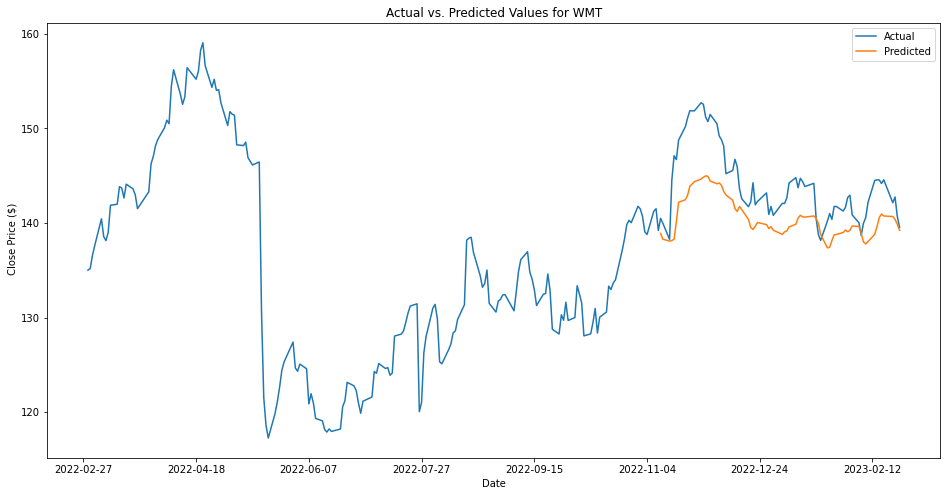

In [33]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt


# Set figure size and create axes object
fig, ax = plt.subplots(figsize=(16, 8))

# Plot actual and predicted values
ax.plot(df['Date'], df['Close'], label='Actual')
ax.plot(df.iloc[split+n:]['Date'], testpredict, label='Predicted')

# Add labels and legend
ax.set_title('Actual vs. Predicted Values for WMT')
ax.set_xlabel('Date')
ax.set_ylabel(' Close Price ($)')
ax.legend()

# Format x-axis date labels
ax.xaxis.set_major_locator(plt.MaxNLocator(8))

# Show the plot
plt.show()

In [34]:
import pandas as pd

# Load original data into a DataFrame
df = pd.read_excel('WMT LSTM.xlsx', index_col='Date', parse_dates=True)

# Extract the dates from the test data
dates = df.index[-len(testpredict):]

# Create a new DataFrame with the predicted values
predictions = pd.DataFrame({'Predictions': testpredict}, index=dates)

# Concatenate the original "Close" column with the predicted values
result = pd.concat([df['Close'], predictions], axis=1)


In [35]:
result = result.tail(30)

result.to_csv('WMT close and predicted prices updated.csv')